In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sb

In [2]:
dir_fig = 'pca_calculation/'

In [3]:
file_cov = '/expanse/projects/sebat1/s3/data/sebat/long_reads_pipeline_results/coverages_mod.tsv'
#file_cov = '/tscc/projects/ps-sebat1/s3/data/sebat/long_reads_pipeline_results/coverages_mod.tsv'
df_cov = pd.read_table(file_cov, header=0, sep='\t')
multiplat_samples = ['REACH000236', 'REACH000530', 'REACH000531', 'REACH000532', 'REACH000436']
df_cov['SAMPLE'] = df_cov.apply(lambda row: row['SAMPLE']+'_'+row['COHORT'] if row['SAMPLE'] in multiplat_samples else row['SAMPLE'], axis=1)
df_cov_high = df_cov.loc[df_cov.SAMPLE.str.startswith('REACH000') & (df_cov.MEAN_COVERAGE > 9)]
display(df_cov)
high_cov_samples = df_cov_high.SAMPLE.tolist()
#print(high_cov_samples)

def get_plat(sample):
    try:
        ret = df_cov[df_cov.SAMPLE == sample]['COHORT'].values[0]
    except:
        print(f'problem with samples: {sample}')
        ret = ''
    return ret

plat_dict = {sample: get_plat(sample) for sample in df_cov.SAMPLE.tolist()}

,SAMPLE,COHORT,MEAN_COVERAGE
0,HG004,ONT,81.44
1,REACH000626,ONT,10.51
2,REACH000546,ONT,10.87
3,REACH000683,ONT,9.97
4,REACH000563,ONT,8.68
...,...,...,...
283,REACH000284,PB,3.43
284,REACH000672,PB,5.02
285,REACH000292,PB,9.00
286,REACH000066,PB,1.61


In [4]:
file_psam = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/process_IL_LR/HWE/REACH_LR_platform.psam'
df_p = pd.read_table(file_psam, sep='\t', header=None, names = ['famid', 'sample_id', 'dad', 'mom', 'sex', 'phen'])
display(df_p)

# make mom and dad dictionary
sample_dad_dict = {}
sample_mom_dict = {}
for sample, dad, mom in zip(df_p.sample_id, df_p.dad, df_p.mom):
    #print(sample, dad, mom)
    sample_dad_dict[sample] = dad
    sample_mom_dict[sample] = mom

print('complete trios:')
df_trios = df_p.loc[df_p.dad.isin(df_p.sample_id) & df_p.mom.isin(df_p.sample_id)]
display(df_trios)
print(df_trios.sex.value_counts())
print(df_trios.phen.value_counts())

parents_set_lr = set(df_trios.dad.tolist()) | set(df_trios.mom.tolist())
print(f'len(parents_set_lr): {len(parents_set_lr)}')
#print(parents_set_lr)

rename_samples_dict_IL = {'REACH000236_PB': 'REACH000236_IL', 
                          'REACH000436_PB': 'REACH000436_IL', 
                          'REACH000530_PB': 'REACH000530_IL', 
                          'REACH000531_ONT': 'REACH000531_IL', 
                          'REACH000532_ONT': 'REACH000532_IL'}
parents_set_sr = {x if x not in rename_samples_dict_IL else rename_samples_dict_IL[x] for x in parents_set_lr}
print(f'len(parents_set_sr): {len(parents_set_sr)}')
#print(parents_set_sr)

parent_kids_dict = {}
mom_kids_dict = {}
dad_kids_dict = {}
for parent in parents_set_lr:
    parent_kids_dict[parent] = df_trios.loc[(df_trios.dad == parent) | (df_trios.mom == parent)].sample_id.tolist()
    if parent in df_trios.dad.tolist():
        dad_kids_dict[parent] = df_trios.loc[(df_trios.dad == parent)].sample_id.tolist()
    if parent in df_trios.mom.tolist():
        mom_kids_dict[parent] = df_trios.loc[(df_trios.mom == parent)].sample_id.tolist()
print(f'len(parent_kids_dict): {len(parent_kids_dict)}')
#print(parent_kids_dict)
print(f'len(mom_kids_dict): {len(mom_kids_dict)}')
#print(mom_kids_dict)
print(f'len(dad_kids_dict): {len(dad_kids_dict)}')
#print(dad_kids_dict)

mate_dict = {}
for dad, mom in zip(df_trios.dad, df_trios.mom):
    mate_dict[dad] = mom
    mate_dict[mom] = dad
print(f'len(mate_dict): {len(mate_dict)}')
#print(mate_dict)

,famid,sample_id,dad,mom,sex,phen
0,2323,2323-2-1,0,0,2,2
1,2602,2602-2-1,0,0,2,2
2,3392,3392-2-3,0,0,2,2
3,3538,3538-2-1,0,0,2,2
4,3939,3939-3-1,0,0,2,2
...,...,...,...,...,...,...
275,F0270,REACH000681,REACH000683,REACH000682,1,2
276,F0270,REACH000682,0,0,2,2
277,F0270,REACH000683,0,0,1,2
278,F0270,REACH000684,REACH000683,REACH000682,1,2


complete trios:


,famid,sample_id,dad,mom,sex,phen
10,F0026,REACH000026,REACH000270,REACH000269,1,2
11,F0058,REACH000058,REACH000440,REACH000439,1,2
12,F0065,REACH000065,REACH000067,REACH000066,1,2
15,F0078,REACH000086,REACH000088,REACH000087,1,2
18,F0078,REACH000089,REACH000088,REACH000087,2,2
...,...,...,...,...,...,...
271,F0266,REACH000660,REACH000662,REACH000661,2,2
274,F0266,REACH000663,REACH000662,REACH000661,1,1
275,F0270,REACH000681,REACH000683,REACH000682,1,2
278,F0270,REACH000684,REACH000683,REACH000682,1,2


sex
1    74
2    43
Name: count, dtype: int64
phen
2    92
1    25
Name: count, dtype: int64
len(parents_set_lr): 126
len(parents_set_sr): 126
len(parent_kids_dict): 126
len(mom_kids_dict): 63
len(dad_kids_dict): 63
len(mate_dict): 126


In [5]:
meta_file = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/REACH_sample_info.tsv'
df_meta = pd.read_table(meta_file, sep='\t', header=0)

rename_samples_dict = {'REACH000236': 'REACH000236_PB', 
                       'REACH000436': 'REACH000436_PB', 
                       'REACH000530': 'REACH000530_PB', 
                       'REACH000531': 'REACH000531_ONT', 
                       'REACH000532': 'REACH000532_ONT'}
df_meta['Sample_ID'] = df_meta.apply(lambda row: rename_samples_dict[row['Sample_ID']] 
                                     if row['Sample_ID'] in rename_samples_dict else row['Sample_ID'], axis=1)

aff_dict = {}
for sample, aff in zip(df_meta['Sample_ID'].tolist(), df_meta['Affected'].tolist()):
    aff_dict[sample] = aff
    
aff_dict_asd = {}
for sample, aff in zip(df_meta['Sample_ID'].tolist(), df_meta['Affected_ASD'].tolist()):
    aff_dict_asd[sample] = aff

In [6]:
#file_pca = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/PCA/kid_pca_info.csv'
#file_pca = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/PCA/SummaryGeneticData_REACH_SSC_SPARK.SBayesR.20210915.csv'
file_pca = '/expanse/projects/sebat1/j3guevar/SFARI/aspera-sf/SFARI_DS468588/data/master_phen_4.SBayesR.20210915.csv'

df_pca = pd.read_table(file_pca, sep=',', header=0)
cols = ['fid', 'iid', 'phen','sex','cohort','duo','family','is_eur','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10', 
        'PC1_PAT','PC2_PAT','PC3_PAT','PC4_PAT','PC5_PAT','PC6_PAT','PC7_PAT','PC8_PAT','PC9_PAT','PC10_PAT', 
        'PC1_MAT','PC2_MAT','PC3_MAT','PC4_MAT','PC5_MAT','PC6_MAT','PC7_MAT','PC8_MAT','PC9_MAT','PC10_MAT']
df_pca = df_pca[cols]

rename_samples_dict = {'REACH000236': 'REACH000236_PB', 
                       'REACH000436': 'REACH000436_PB', 
                       'REACH000530': 'REACH000530_PB', 
                       'REACH000531': 'REACH000531_ONT', 
                       'REACH000532': 'REACH000532_ONT'}
df_pca['iid'] = df_pca.apply(lambda row: rename_samples_dict[row['iid']] if row['iid'] in rename_samples_dict else row['iid'], axis=1)
#display(df_pca)

# first filter for the kids, then add parents to them
df_pca_flt = df_pca.loc[df_pca.iid.isin(df_trios.sample_id)].copy()
df_pca_flt['rel'] = 'C'
print('df_pca_flt:')
display(df_pca_flt)

df_parents = pd.DataFrame()
for index, row in df_pca_flt.iterrows():
    sample = row['iid']
    fid = row['fid']
    phen = row['phen']
    is_eur = row['is_eur']
    pc_mat = [row[f'PC{x}_MAT'] for x in range(1,11)]
    pc_pat = [row[f'PC{x}_PAT'] for x in range(1,11)]
    dad = sample_dad_dict[sample]
    mom = sample_mom_dict[sample]
    
    dict_mat = {'fid': [fid], 'iid': [mom], 'phen': ['.'], 'sex': ['Female'], 'cohort': [1], 'duo': ['.'], 'is_eur': [is_eur]}
    dict_mat.update({f'PC{x}': [pc_mat[x-1]] for x in range(1,11)})
    df_mat = pd.DataFrame(dict_mat)

    dict_pat = {'fid': [fid], 'iid': [dad], 'phen': ['.'], 'sex': ['Male'], 'cohort': [1], 'duo': ['.'], 'is_eur': [is_eur]}
    dict_pat.update({f'PC{x}': [pc_pat[x-1]] for x in range(1,11)})
    df_pat = pd.DataFrame(dict_pat)
    
    if df_parents.shape[0] == 0 or mom not in df_parents.iid.tolist():
        df_parents = pd.concat([df_parents, df_mat])
    if df_parents.shape[0] == 0 or dad not in df_parents.iid.tolist():
        df_parents = pd.concat([df_parents, df_pat])

df_parents['rel'] = 'P'
print('df_parents:')
display(df_parents)

df_pca_flt = pd.concat([df_pca_flt, df_parents])
print('df_pca_flt:')
display(df_pca_flt)

df_pca_flt = pd.merge(df_pca_flt, df_meta[['Sample_ID', 'Affected', 'Affected_ASD']], how='inner', left_on='iid', right_on='Sample_ID')
df_pca_flt = pd.merge(df_pca_flt, df_cov[['SAMPLE', 'MEAN_COVERAGE']], how='inner', left_on='iid', right_on='SAMPLE')

df_pca_flt['Phenotype'] = df_pca_flt.apply(lambda row: 1 if row.Affected == 'Yes' else 0, axis=1)
df_pca_flt['Phenotype_ASD'] = df_pca_flt.apply(lambda row: 1 if row.Affected_ASD == 'Yes' else 0, axis=1)
df_pca_flt['Platform'] = df_pca_flt.apply(lambda row: get_plat(row.iid), axis=1)
#df_pca_flt.to_csv('investigate2.tsv', sep='\t', index=None)

df_pca_flt:


,fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,...,PC2_MAT,PC3_MAT,PC4_MAT,PC5_MAT,PC6_MAT,PC7_MAT,PC8_MAT,PC9_MAT,PC10_MAT,rel
136,F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627,-0.005607,...,0.000410,0.002845,-0.019312,-0.013769,-0.014384,0.007249,0.002096,0.005399,-0.014983,C
137,F0026,REACH000026,ASD,Male,1,trio,1,0,0.095364,-0.045230,...,-0.047780,-0.017435,0.153686,0.005292,-0.009487,-0.020773,0.034190,0.015895,-0.011925,C
139,F0058,REACH000058,ASD,Male,1,trio,1,1,0.002422,-0.009216,...,-0.003289,0.003757,-0.004828,0.007650,0.005633,0.032103,0.009510,0.020007,0.016383,C
140,F0065,REACH000065,ASD,Male,1,trio,1,0,0.252774,0.107933,...,0.049799,0.158347,0.011411,0.004728,0.007690,-0.006605,0.008261,-0.012000,-0.009906,C
146,F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785,0.038065,...,0.080387,0.132056,0.029583,0.020156,0.007971,-0.002383,0.014468,0.006253,-0.018303,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,F0290,REACH000762,ASD,Male,1,trio,1,1,-0.027901,0.000946,...,0.003052,-0.009075,-0.014136,-0.005499,-0.008555,0.015644,0.004869,0.011004,-0.019684,C
409,F0290,REACH000765,CON,Female,1,trio,1,1,-0.030809,-0.001867,...,0.003052,-0.009075,-0.014136,-0.005499,-0.008555,0.015644,0.004869,0.011004,-0.019684,C
410,F0290,REACH000766,CON,Female,1,trio,1,1,-0.028469,-0.005167,...,0.003052,-0.009075,-0.014136,-0.005499,-0.008555,0.015644,0.004869,0.011004,-0.019684,C
411,F0291,REACH000767,ASD,Male,1,trio,1,0,0.087690,-0.012273,...,-0.016917,-0.021358,0.151522,-0.035297,0.008383,0.005679,0.020179,-0.022316,0.002755,C


df_parents:


,fid,iid,phen,sex,cohort,duo,is_eur,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,rel
0,F0001,REACH000107,.,Female,1,.,1,-0.022403,0.000410,0.002845,-0.019312,-0.013769,-0.014384,0.007249,0.002096,0.005399,-0.014983,P
0,F0001,REACH000226,.,Male,1,.,1,0.024023,-0.013482,-0.003936,0.129597,0.030587,-0.007727,-0.002212,-0.022159,0.005150,-0.000824,P
0,F0026,REACH000269,.,Female,1,.,0,0.100551,-0.047780,-0.017435,0.153686,0.005292,-0.009487,-0.020773,0.034190,0.015895,-0.011925,P
0,F0026,REACH000270,.,Male,1,.,0,0.091671,-0.037847,-0.022134,0.163193,0.007864,-0.006841,-0.023716,0.040800,0.006666,-0.012916,P
0,F0058,REACH000439,.,Female,1,.,1,-0.025327,-0.003289,0.003757,-0.004828,0.007650,0.005633,0.032103,0.009510,0.020007,0.016383,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,F0288,REACH000756,.,Male,1,.,0,0.204041,0.127559,0.190286,0.013553,0.006706,-0.001266,-0.010150,0.006605,-0.006867,0.006560,P
0,F0290,REACH000763,.,Female,1,.,1,-0.030630,0.003052,-0.009075,-0.014136,-0.005499,-0.008555,0.015644,0.004869,0.011004,-0.019684,P
0,F0290,REACH000764,.,Male,1,.,1,-0.027327,-0.004878,-0.003881,0.000495,0.003727,-0.001647,-0.008831,0.016730,-0.005315,0.006958,P
0,F0291,REACH000768,.,Female,1,.,0,0.091442,-0.016917,-0.021358,0.151522,-0.035297,0.008383,0.005679,0.020179,-0.022316,0.002755,P


df_pca_flt:


,fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,...,PC2_MAT,PC3_MAT,PC4_MAT,PC5_MAT,PC6_MAT,PC7_MAT,PC8_MAT,PC9_MAT,PC10_MAT,rel
136,F0001,REACH000001,ASD,Male,1,trio,1.0,1,0.008627,-0.005607,...,0.000410,0.002845,-0.019312,-0.013769,-0.014384,0.007249,0.002096,0.005399,-0.014983,C
137,F0026,REACH000026,ASD,Male,1,trio,1.0,0,0.095364,-0.045230,...,-0.047780,-0.017435,0.153686,0.005292,-0.009487,-0.020773,0.034190,0.015895,-0.011925,C
139,F0058,REACH000058,ASD,Male,1,trio,1.0,1,0.002422,-0.009216,...,-0.003289,0.003757,-0.004828,0.007650,0.005633,0.032103,0.009510,0.020007,0.016383,C
140,F0065,REACH000065,ASD,Male,1,trio,1.0,0,0.252774,0.107933,...,0.049799,0.158347,0.011411,0.004728,0.007690,-0.006605,0.008261,-0.012000,-0.009906,C
146,F0078,REACH000086,ASD,Male,1,trio,2.0,0,0.044785,0.038065,...,0.080387,0.132056,0.029583,0.020156,0.007971,-0.002383,0.014468,0.006253,-0.018303,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,F0288,REACH000756,.,Male,1,.,NaN,0,0.204041,0.127559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P
0,F0290,REACH000763,.,Female,1,.,NaN,1,-0.030630,0.003052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P
0,F0290,REACH000764,.,Male,1,.,NaN,1,-0.027327,-0.004878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P
0,F0291,REACH000768,.,Female,1,.,NaN,0,0.091442,-0.016917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P


In [7]:
#########################################
file_name = 'test.tsv'
df = pd.read_table(file_name, sep='\t', header=0)

/scratch/smmortazavi/job_34313359/ipykernel_4232/1171135493.py:3: DtypeWarning: Columns (25,68,70,71,75,76,77,78,79,80,81,82,86,97,98,99,100,101,102,103,104,108,109,110,111,112,113,114,115,119,120,121,122,123,124,125,126) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(file_name, sep='\t', header=0)


In [8]:
def get_df_flt(df, flt_name, svtypes, ext_col=None, flt_sd_art=True, freq_col=None, freq_thr=None):
    if not ext_col:
        df_flt = df.loc[((df[f'NUM_{flt_name}'] > 0) | (df['NUM_IL_SAMPLES'] > 0)) & (df.SVTYPE.isin(svtypes))]
    else:
        df_flt = df.loc[((df[f'NUM_{flt_name}'] > 0) | (df['NUM_IL_SAMPLES'] > 0)) & (df.SVTYPE.isin(svtypes)) & (df[ext_col]==1)]
    if flt_sd_art:
        df_flt = df_flt.loc[~((df_flt.SD_ART==1) & (df_flt.PLATFORM=='LR'))]
    if freq_thr != None:
        df_flt = df_flt.loc[df_flt[f'freq_{freq_col}']<=freq_thr]
    return df_flt

In [9]:
sample_order = df_pca_flt.iid.tolist()
sample_platform = df_pca_flt.Platform.tolist()
sample_pb = [s for s, x in zip(sample_order, sample_platform) if x=='PB']
sample_ont = [s for s, x in zip(sample_order, sample_platform) if x=='ONT']
#print(len(sample_order))
#print(sample_order)
print(f'pb len: {len(sample_pb)}')
print(f'ont len: {len(sample_ont)}')

def get_gt_col(row, col_lr, col_sr):
    samples = [x for x in row[col_lr].split(',') if x in sample_order] + [x for x in row[col_sr].split(',') if x in sample_order]
    ret_col = [0 for sample in sample_order]
    for sample in samples:
        idx = sample_order.index(sample)
        ret_col[idx] = 1
    return ret_col

def get_gt_col_one(row, col):
    samples = [x for x in row[col].split(',') if x in sample_order]
    ret_col = [0 for sample in sample_order]
    for sample in samples:
        idx = sample_order.index(sample)
        ret_col[idx] = 1
    return ret_col

pb len: 142
ont len: 101


++++++++++++++++++++++++++++++++++++++++
SQ20_SAMPLES
total: (344736, 456)
filtered: (26506, 456)
X shape: (243, 26506)
X_ont shape: (101, 26506)
X_pb shape: (142, 26506)
pca_calculation/PC1_vs_PC2_ALL_SQ20_SAMPLES.png


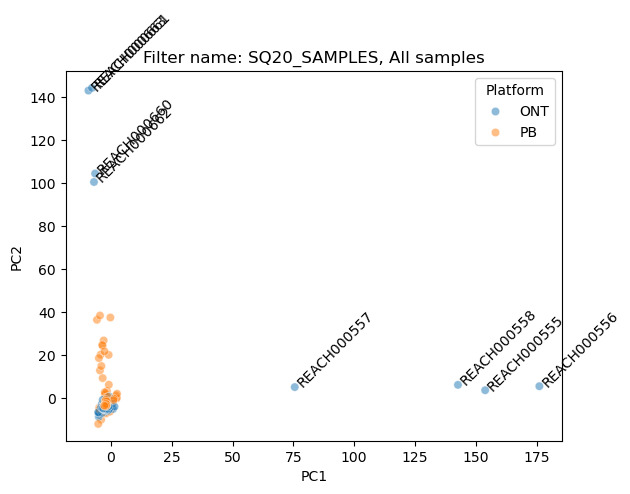

pca_calculation/PC1_vs_PC2_PB_SQ20_SAMPLES.png


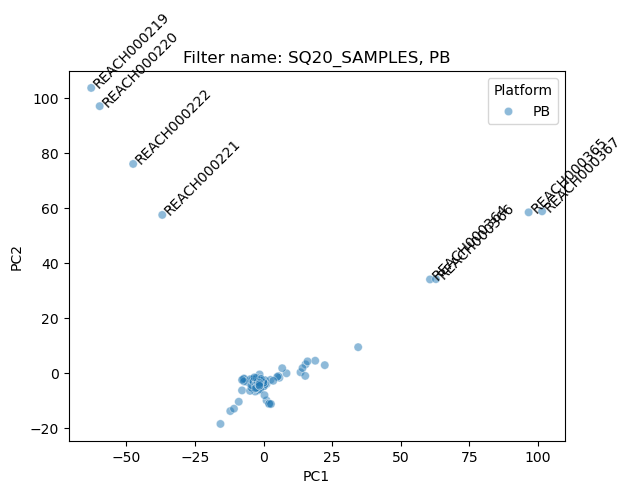

pca_calculation/PC1_vs_PC2_ONT_SQ20_SAMPLES.png


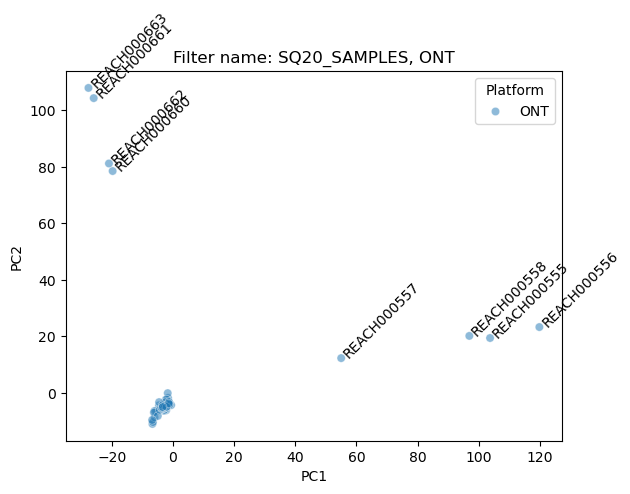

++++++++++++++++++++++++++++++++++++++++
SQ30_SAMPLES
total: (344736, 456)
filtered: (22360, 456)
X shape: (243, 22360)
X_ont shape: (101, 22360)
X_pb shape: (142, 22360)
pca_calculation/PC1_vs_PC2_ALL_SQ30_SAMPLES.png


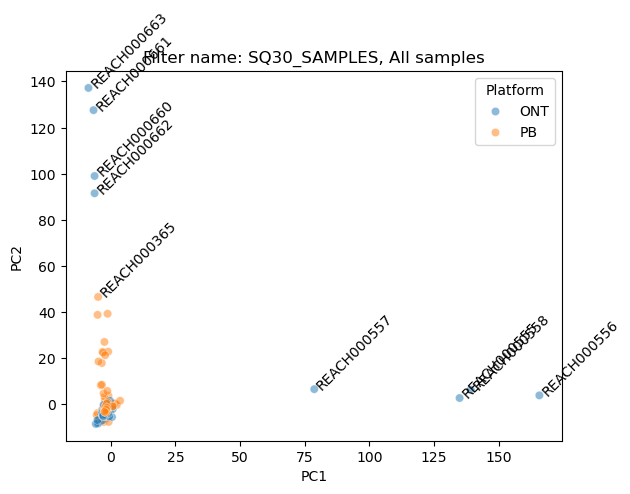

pca_calculation/PC1_vs_PC2_PB_SQ30_SAMPLES.png


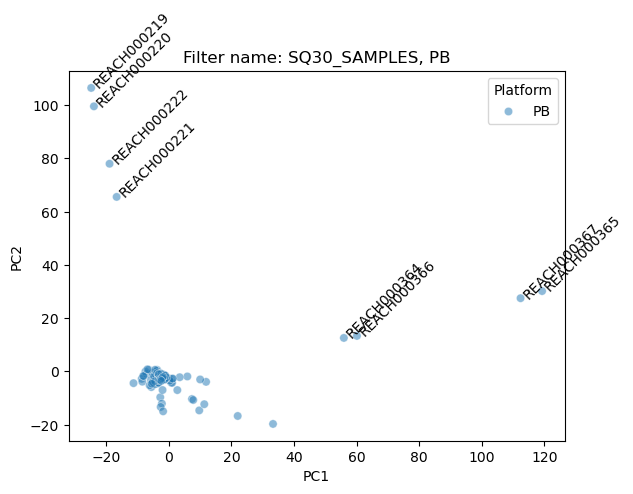

pca_calculation/PC1_vs_PC2_ONT_SQ30_SAMPLES.png


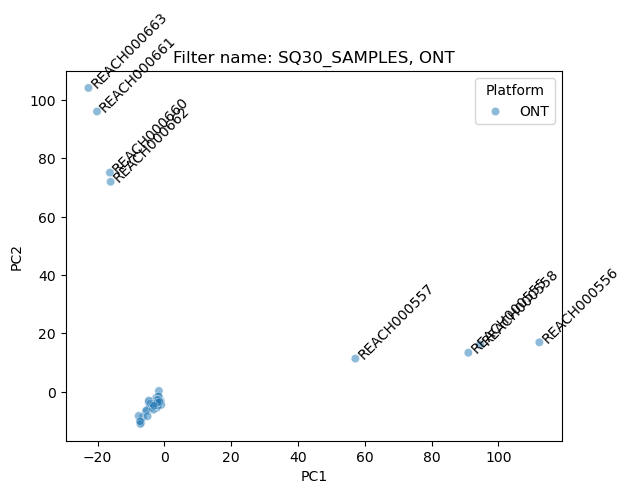

++++++++++++++++++++++++++++++++++++++++
SQ40_SAMPLES
total: (344736, 456)
filtered: (20483, 456)
X shape: (243, 20483)
X_ont shape: (101, 20483)
X_pb shape: (142, 20483)
pca_calculation/PC1_vs_PC2_ALL_SQ40_SAMPLES.png


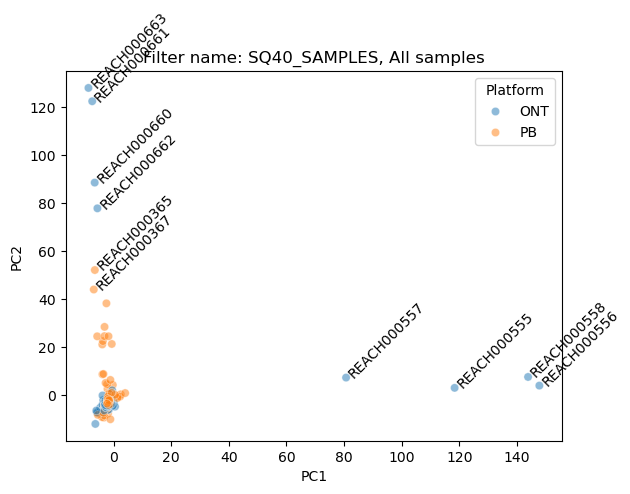

pca_calculation/PC1_vs_PC2_PB_SQ40_SAMPLES.png


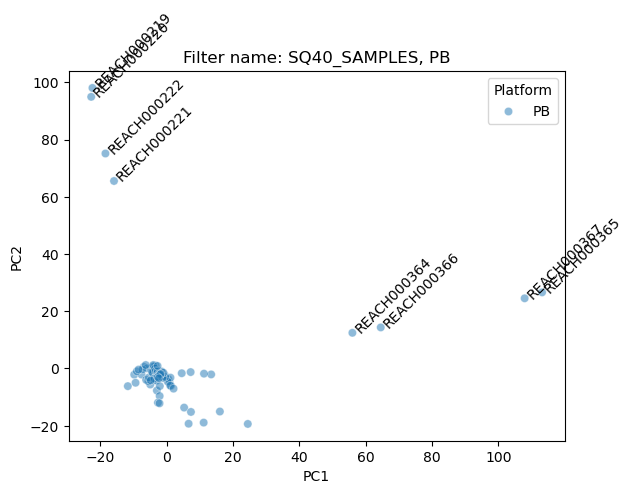

pca_calculation/PC1_vs_PC2_ONT_SQ40_SAMPLES.png


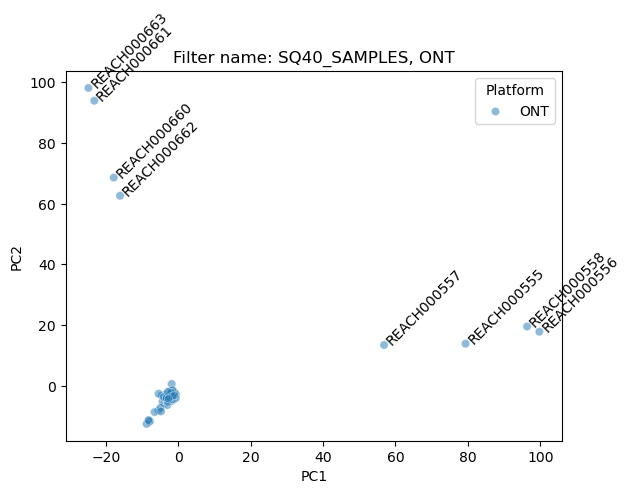

++++++++++++++++++++++++++++++++++++++++
SQ50_SAMPLES
total: (344736, 456)
filtered: (18701, 456)
X shape: (243, 18701)
X_ont shape: (101, 18701)
X_pb shape: (142, 18701)
pca_calculation/PC1_vs_PC2_ALL_SQ50_SAMPLES.png


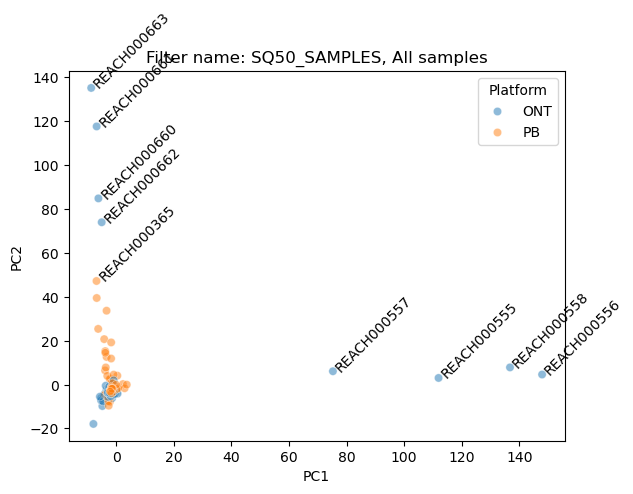

pca_calculation/PC1_vs_PC2_PB_SQ50_SAMPLES.png


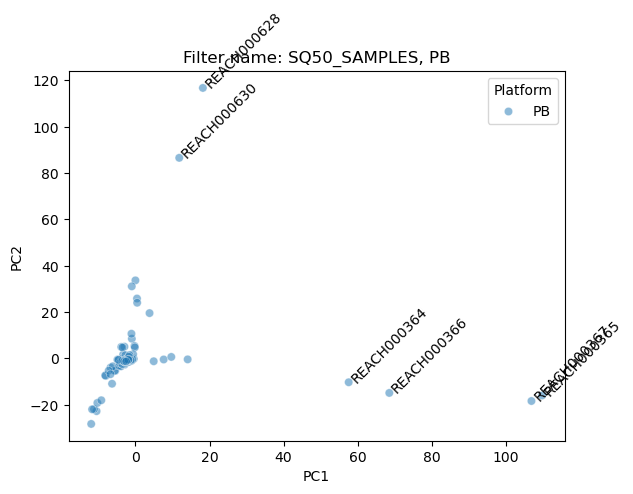

pca_calculation/PC1_vs_PC2_ONT_SQ50_SAMPLES.png


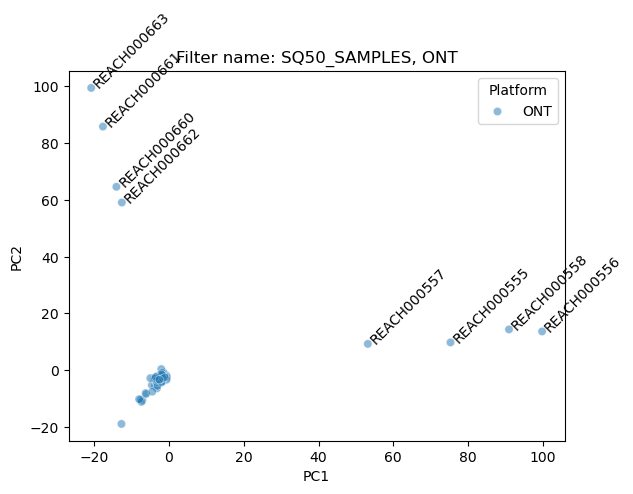

++++++++++++++++++++++++++++++++++++++++
SQ60_SAMPLES
total: (344736, 456)
filtered: (17623, 456)
X shape: (243, 17623)
X_ont shape: (101, 17623)
X_pb shape: (142, 17623)
pca_calculation/PC1_vs_PC2_ALL_SQ60_SAMPLES.png


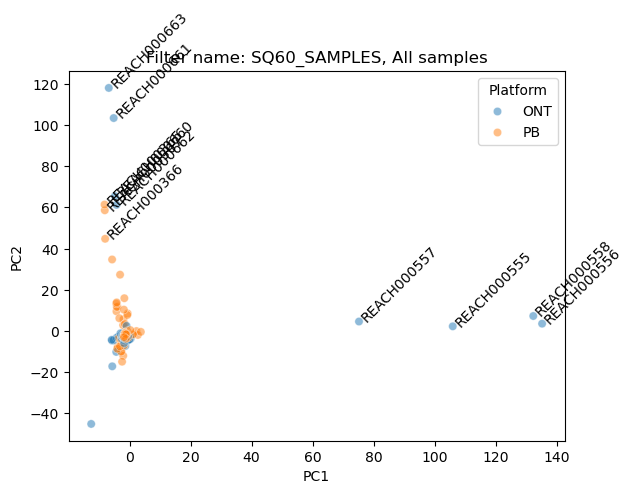

pca_calculation/PC1_vs_PC2_PB_SQ60_SAMPLES.png


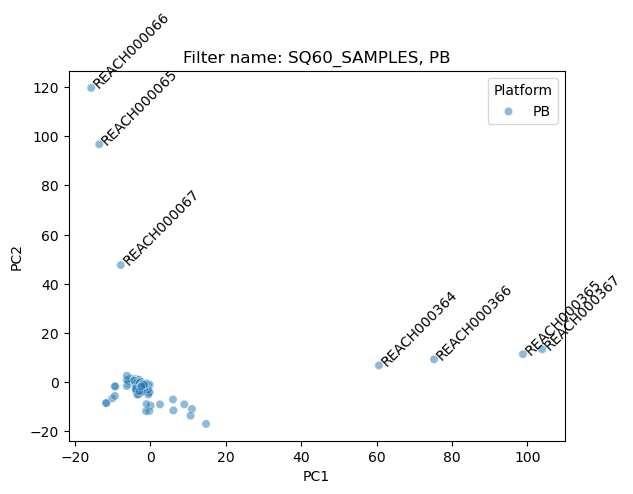

pca_calculation/PC1_vs_PC2_ONT_SQ60_SAMPLES.png


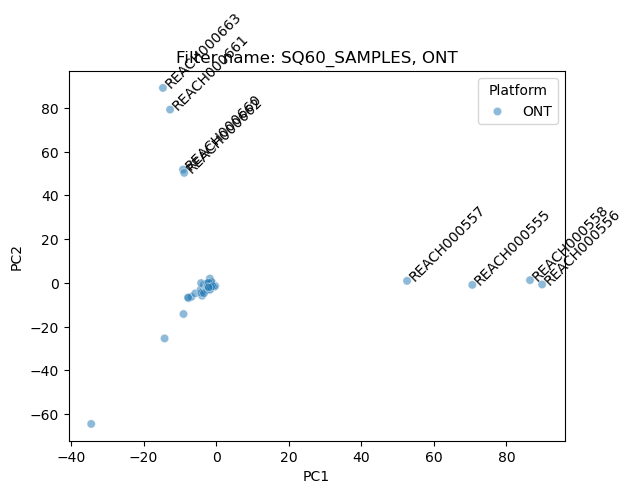

++++++++++++++++++++++++++++++++++++++++
SQ70_SAMPLES
total: (344736, 456)
filtered: (16430, 456)
X shape: (243, 16430)
X_ont shape: (101, 16430)
X_pb shape: (142, 16430)
pca_calculation/PC1_vs_PC2_ALL_SQ70_SAMPLES.png


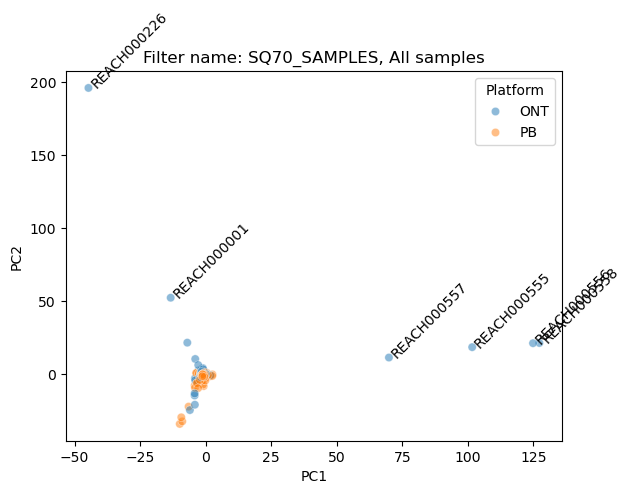

pca_calculation/PC1_vs_PC2_PB_SQ70_SAMPLES.png


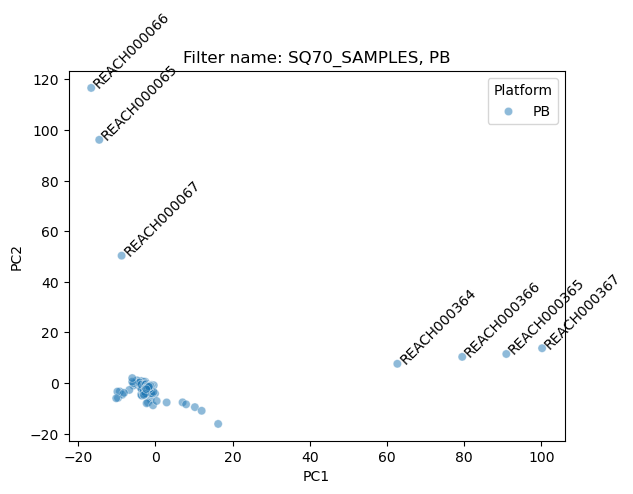

pca_calculation/PC1_vs_PC2_ONT_SQ70_SAMPLES.png


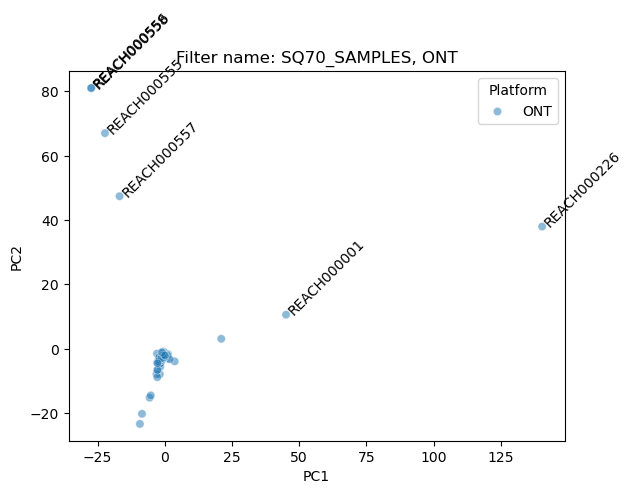

df_pca_all:


,PC1_SQ20_SAMPLES,PC2_SQ20_SAMPLES,PC3_SQ20_SAMPLES,PC4_SQ20_SAMPLES,PC5_SQ20_SAMPLES,PC6_SQ20_SAMPLES,PC7_SQ20_SAMPLES,PC8_SQ20_SAMPLES,PC9_SQ20_SAMPLES,PC10_SQ20_SAMPLES,...,PC1_SQ70_SAMPLES,PC2_SQ70_SAMPLES,PC3_SQ70_SAMPLES,PC4_SQ70_SAMPLES,PC5_SQ70_SAMPLES,PC6_SQ70_SAMPLES,PC7_SQ70_SAMPLES,PC8_SQ70_SAMPLES,PC9_SQ70_SAMPLES,PC10_SQ70_SAMPLES
0,-4.650942,-6.578765,0.259853,-7.582549,-0.153923,-0.102520,-10.383152,-9.764874,0.793908,3.216847,...,-13.347086,52.095598,12.912270,0.175484,2.790131,1.954927,2.501461,3.516719,0.698720,-3.156587
1,-3.959827,-10.076375,9.116785,-10.967657,-55.759074,98.990473,55.411250,2.860730,3.745351,-19.063623,...,-1.910014,-0.284098,-14.567901,-1.594785,6.230457,31.806191,54.895736,-21.960447,85.079847,34.582324
2,-2.468460,-4.459138,-2.334919,-1.766186,-0.681480,1.696647,-4.530072,-2.867749,-0.455100,-0.339104,...,-1.094284,-0.823517,-2.428038,-0.749672,-2.197533,-1.483337,-0.562621,-1.080672,1.645591,-0.794097
3,-1.571122,-4.995309,5.664269,-7.118226,-15.284936,-4.353867,20.648656,30.404923,-4.224509,124.201451,...,-2.326284,0.262303,-21.893927,4.519204,113.451045,-31.380338,-5.421833,1.790782,-6.587440,7.593257
4,-2.047320,-3.653583,-0.995668,-2.735781,-1.274736,-0.098271,-3.062610,-0.127866,0.461890,4.123250,...,-1.464148,-0.102684,-3.248786,0.035751,0.283011,0.632377,-0.769408,-0.523774,0.866588,-0.562484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,-1.601009,-1.533680,-0.373718,-0.815975,-0.169285,-1.300386,0.917656,0.072257,-0.375797,0.864081,...,-1.200083,-1.062201,-2.169605,-0.599349,-1.230694,-1.438075,-0.259236,-0.010508,-0.545551,-1.678677
239,-1.649239,-3.002958,-1.887238,-1.499476,-0.950208,-0.021984,-2.643229,-1.115341,-0.331763,-0.283021,...,-0.668066,-0.911510,-2.151128,-0.433346,-1.400017,-0.957032,-0.543159,-1.123496,1.260078,-0.762999
240,-1.949769,-2.652287,-1.494097,-1.730100,-1.181704,-0.155425,-2.294907,-1.053929,-0.627480,0.191947,...,-1.145494,-0.274793,-2.112315,-0.190737,-1.579751,-0.849050,-0.744535,-0.923806,1.114993,-1.570141
241,-1.935160,-3.683598,-0.683778,-0.309258,-3.634754,1.914553,-2.468911,0.773821,-0.101991,-0.955304,...,-0.487905,-2.087687,-5.217015,-3.203908,-3.664589,0.688413,1.961160,-3.567624,7.976233,-9.065447


df_var_explained:


,explained_variance_ratio_SQ20_SAMPLES,explained_variance_ratio_SQ30_SAMPLES,explained_variance_ratio_SQ40_SAMPLES,explained_variance_ratio_SQ50_SAMPLES,explained_variance_ratio_SQ60_SAMPLES,explained_variance_ratio_SQ70_SAMPLES
0,0.014065,0.014497,0.014055,0.014375,0.013745,0.013716
1,0.012739,0.013071,0.012916,0.013150,0.012788,0.013376
2,0.010950,0.011277,0.011486,0.011866,0.012182,0.012770
3,0.010533,0.011075,0.011079,0.011364,0.011934,0.012107
4,0.010218,0.010924,0.010946,0.011148,0.011258,0.011662
5,0.010073,0.010224,0.010291,0.010601,0.010932,0.011106
6,0.009829,0.010157,0.010233,0.010485,0.010750,0.010894
7,0.009647,0.009859,0.010170,0.010375,0.010438,0.010726
8,0.009552,0.009735,0.009828,0.010262,0.010373,0.010675
9,0.009488,0.009627,0.009716,0.010089,0.010274,0.010502


pca_calculation/PC_data_ALL.tsv
pca_calculation/var_explained_data_ALL.tsv
df_pca_all_pb:


,PC1_SQ20_SAMPLES,PC2_SQ20_SAMPLES,PC3_SQ20_SAMPLES,PC4_SQ20_SAMPLES,PC5_SQ20_SAMPLES,PC6_SQ20_SAMPLES,PC7_SQ20_SAMPLES,PC8_SQ20_SAMPLES,PC9_SQ20_SAMPLES,PC10_SQ20_SAMPLES,...,PC1_SQ70_SAMPLES,PC2_SQ70_SAMPLES,PC3_SQ70_SAMPLES,PC4_SQ70_SAMPLES,PC5_SQ70_SAMPLES,PC6_SQ70_SAMPLES,PC7_SQ70_SAMPLES,PC8_SQ70_SAMPLES,PC9_SQ70_SAMPLES,PC10_SQ70_SAMPLES
0,-12.103945,-13.859362,-54.137147,77.566723,40.184469,5.591543,-14.271666,1.457007,1.612735,2.038782,...,-9.214171,-3.342369,18.351000,-15.681401,-47.422679,-46.738187,56.411673,32.852888,10.583343,1.564034
1,-1.640784,-4.610102,-2.442359,-0.851338,-5.495254,-3.924880,1.702728,0.473690,-2.399059,-5.192823,...,-1.441224,-1.987811,-1.319550,-0.473907,-3.191952,0.243693,-3.209250,-2.743731,-0.097236,-0.067838
2,-9.017234,-10.464056,-18.916012,-64.451342,76.189479,46.709734,-12.465867,7.741861,-0.513249,2.879504,...,-14.555972,96.125439,-8.586845,-3.910776,9.819474,0.225679,3.102731,8.212042,1.929800,-4.718860
3,-2.677578,-5.182284,-2.397188,-4.825982,-2.378087,-5.514607,3.484417,-1.407718,-1.566743,-4.600309,...,-2.549214,-0.570733,-0.625061,0.373278,-1.854774,-0.524058,-2.712632,-3.083910,-0.959366,1.084684
4,-2.768729,-4.640565,-1.838883,-3.768610,-2.711606,-4.487797,2.784269,-1.975189,-1.644470,-3.913092,...,-2.569357,-0.204231,-0.367359,1.131764,-2.054747,-0.143940,-2.357275,-2.342914,-1.405274,1.547483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.889565,-2.162132,-1.301713,-2.386724,-1.765282,-2.132346,0.795487,1.645074,1.833362,-0.679931,...,-1.207440,-1.138659,-1.259738,-0.659467,-1.188597,0.294974,-4.187353,-2.442905,0.608603,0.029129
138,-1.292815,-3.927824,-0.825831,-1.089399,-3.459572,-1.908765,1.301286,0.521479,0.190270,-3.870763,...,-1.624814,-1.295867,-0.852300,0.001253,-2.432746,0.113603,-2.586967,-1.732325,0.524740,-0.474391
139,-1.452418,-3.531830,-0.979508,-1.252524,-2.643392,-2.622566,1.149639,0.984862,0.388877,-3.237475,...,-1.723105,-1.501887,-1.226962,0.030361,-2.177936,0.665846,-2.129177,-1.776166,0.302894,-0.235408
140,-1.608307,-4.162209,-2.137856,0.153018,-4.058069,-2.737639,0.194728,3.684016,0.964195,-5.252506,...,-3.002264,-4.741637,-3.160461,-0.896992,-11.583439,3.871521,-2.822351,-4.805285,2.954551,-43.118117


df_var_explained_pb:


,explained_variance_ratio_SQ20_SAMPLES,explained_variance_ratio_SQ30_SAMPLES,explained_variance_ratio_SQ40_SAMPLES,explained_variance_ratio_SQ50_SAMPLES,explained_variance_ratio_SQ60_SAMPLES,explained_variance_ratio_SQ70_SAMPLES
0,0.019218,0.020121,0.020190,0.021597,0.021801,0.022880
1,0.018604,0.018659,0.018411,0.018675,0.019022,0.020148
2,0.017067,0.017890,0.017819,0.018144,0.018383,0.018951
3,0.016618,0.016859,0.016862,0.017992,0.017768,0.018736
4,0.016438,0.016541,0.016751,0.017556,0.017660,0.018449
5,0.015978,0.016314,0.016348,0.017438,0.017366,0.018230
6,0.015853,0.016043,0.016141,0.017071,0.016951,0.017747
7,0.014879,0.015821,0.015967,0.016162,0.016850,0.017445
8,0.014670,0.015581,0.015883,0.016074,0.016420,0.016811
9,0.014553,0.015203,0.015386,0.015830,0.015692,0.015902


pca_calculation/PC_data_PB.tsv
pca_calculation/var_explained_data_PB.tsv
df_pca_all_ont:


,PC1_SQ20_SAMPLES,PC2_SQ20_SAMPLES,PC3_SQ20_SAMPLES,PC4_SQ20_SAMPLES,PC5_SQ20_SAMPLES,PC6_SQ20_SAMPLES,PC7_SQ20_SAMPLES,PC8_SQ20_SAMPLES,PC9_SQ20_SAMPLES,PC10_SQ20_SAMPLES,...,PC1_SQ70_SAMPLES,PC2_SQ70_SAMPLES,PC3_SQ70_SAMPLES,PC4_SQ70_SAMPLES,PC5_SQ70_SAMPLES,PC6_SQ70_SAMPLES,PC7_SQ70_SAMPLES,PC8_SQ70_SAMPLES,PC9_SQ70_SAMPLES,PC10_SQ70_SAMPLES
0,-5.516569,-6.453342,-7.607101,-24.802178,-10.971811,-8.013681,63.028607,-51.534871,5.776705,13.446234,...,45.110823,10.573739,3.922580,2.046861,-3.591228,-2.277045,-0.333177,-3.232612,-5.730745,-7.984619
1,-3.328316,-5.033954,-2.039484,-9.921538,-2.311766,-2.135644,2.762202,3.390944,0.771776,-15.436102,...,1.051326,-2.996116,-3.498775,-2.299175,-1.805507,-4.984323,-4.192307,-4.888410,-11.500040,-17.494263
2,-6.735245,-10.932979,81.425262,13.782975,-3.017821,3.964009,0.980140,-5.933344,6.482703,8.295565,...,-1.842054,-7.922294,-13.091349,54.645354,26.011983,13.226781,5.010932,-1.484140,0.358703,2.825052
3,-6.572532,-10.285592,81.050014,13.775519,-2.037303,4.258846,-0.040471,-4.536509,6.854341,7.739473,...,-3.045620,-7.904858,-13.510240,55.265175,27.573692,12.960319,5.270796,-2.809351,1.534728,2.131734
4,-6.055615,-8.584361,66.499744,10.399583,-1.899520,3.009482,1.117968,-3.649567,5.111255,6.106065,...,-2.556579,-6.645074,-10.903265,45.492647,21.350682,10.899599,4.729882,-2.609640,-0.049023,0.687956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-2.122685,-4.910886,-4.222725,-1.147758,13.700107,20.373778,2.828820,0.060912,-2.166464,-3.651713,...,-0.335556,-1.933782,-2.672814,-2.337152,-5.148238,9.614711,-5.964076,1.351325,-0.857401,-1.715874
97,-25.941336,104.229881,1.577251,1.129817,1.813542,-1.682640,-1.258326,-1.022336,1.106088,2.034869,...,-8.462411,-20.248835,78.018304,6.328128,4.630505,2.026801,0.162258,3.293581,-0.547560,0.787319
98,-20.962763,81.129096,5.369151,-0.932454,-3.825043,3.199154,2.424762,-0.823493,-1.452268,1.580714,...,-5.187092,-14.524505,52.221137,4.223710,3.237052,-0.098980,-0.353962,-0.431823,1.457346,1.198206
99,-1.407704,-3.670602,-2.297228,-4.953866,-0.928864,-0.070856,0.332980,2.920110,-3.392644,-7.651710,...,-1.030124,-1.133100,-2.479547,-1.196310,-2.474967,-2.944149,-1.812236,-0.734870,-1.765996,-1.244688


df_var_explained_ont:


,explained_variance_ratio_SQ20_SAMPLES,explained_variance_ratio_SQ30_SAMPLES,explained_variance_ratio_SQ40_SAMPLES,explained_variance_ratio_SQ50_SAMPLES,explained_variance_ratio_SQ60_SAMPLES,explained_variance_ratio_SQ70_SAMPLES
0,0.029591,0.030612,0.030175,0.030145,0.029302,0.030370
1,0.028340,0.029091,0.028972,0.028768,0.028264,0.029045
2,0.022435,0.024121,0.024657,0.025861,0.027535,0.027478
3,0.021303,0.022363,0.023689,0.024277,0.024329,0.023929
4,0.020738,0.021535,0.022043,0.022279,0.022718,0.023003
5,0.020409,0.021307,0.021590,0.021655,0.021776,0.022048
6,0.019848,0.021146,0.021432,0.021451,0.021408,0.021405
7,0.019416,0.020354,0.021064,0.020803,0.019854,0.019716
8,0.019128,0.019426,0.019209,0.018918,0.019307,0.019407
9,0.018068,0.018073,0.018138,0.018418,0.018625,0.018694


pca_calculation/PC_data_ONT.tsv
pca_calculation/var_explained_data_ONT.tsv


In [10]:
### write PCA components for SVs
#flt_names = ['AD5_SAMPLES', 'AD4_SAMPLES', 'AD3_SAMPLES', 
#             'SQ20_SAMPLES', 'SQ30_SAMPLES', 'SQ40_SAMPLES', 'SQ50_SAMPLES', 'SQ60_SAMPLES', 'SQ70_SAMPLES']
flt_names = ['SQ20_SAMPLES', 'SQ30_SAMPLES', 'SQ40_SAMPLES', 'SQ50_SAMPLES', 'SQ60_SAMPLES', 'SQ70_SAMPLES']
include_svtypes = ['INS', 'DEL', 'DUP', 'INV', '.']

#samples_col = 'SQ20_SAMPLES'
#samples_col = 'AD2_SAMPLES'
#samples_col = 'AD3_SAMPLES'

freq_col = 'AD2_SAMPLES'

df_pca_all = pd.DataFrame()
df_var_explained = pd.DataFrame()
df_pca_all_pb = pd.DataFrame()
df_var_explained_pb = pd.DataFrame()
df_pca_all_ont = pd.DataFrame()
df_var_explained_ont = pd.DataFrame()
for flt_name in flt_names:
    print('+'*40)
    print(flt_name)
    samples_col = flt_name
    # filter for main svtypes and quality
    df_flt = get_df_flt(df, flt_name, include_svtypes, flt_sd_art=True, freq_col=freq_col, freq_thr=0.05)
    print(f'total: {df.shape}')
    print(f'filtered: {df_flt.shape}')

    #display(df_flt[flt_name])
    #display(df_flt['IL_SAMPLES_LR'])

    # make the full matrix of sample x genotypes
    #X = df_flt.apply(lambda row: get_gt_col(row, flt_name, 'IL_SAMPLES_LR'), axis=1, result_type='expand').T
    X = df_flt.apply(lambda row: get_gt_col(row, samples_col, 'IL_SAMPLES_LR'), axis=1, result_type='expand').T
    X.index = sample_order
    X_pb = X.loc[sample_pb,:]
    X_ont = X.loc[sample_ont,:]
    print(f'X shape: {X.shape}')
    print(f'X_ont shape: {X_ont.shape}')
    print(f'X_pb shape: {X_pb.shape}')

    # calculate PCA dim reduction with 10 components
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)
    pca = PCA(n_components=10, random_state=1248, svd_solver='full')
    principal_components = pca.fit_transform(X_standardized)
    df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i}_{flt_name}' for i in range(1,11,1)])
    #display(df_pca)
    if df_pca_all.empty:
        df_pca_all = pd.DataFrame(df_pca)
    else:
        df_pca_all = pd.concat([df_pca_all, df_pca], axis=1)
    df_var_explained[f'explained_variance_ratio_{flt_name}'] = pca.explained_variance_ratio_
    #print(pca.explained_variance_ratio_)

    # add platform
    df_pca_all['Platform'] = df_pca_flt['Platform']
    df_pca_all['SAMPLE'] = sample_order

    # calculate PCA dim reduction with 10 components for PB only
    scaler = StandardScaler()
    X_pb_standardized = scaler.fit_transform(X_pb)
    pca = PCA(n_components=10, random_state=1, svd_solver='full')
    principal_components_pb = pca.fit_transform(X_pb_standardized)
    df_pca_pb = pd.DataFrame(data=principal_components_pb, columns=[f'PC{i}_{flt_name}' for i in range(1,11,1)])
    #display(df_pca_pb)
    if df_pca_all_pb.empty:
        df_pca_all_pb = pd.DataFrame(df_pca_pb)
    else:
        df_pca_all_pb = pd.concat([df_pca_all_pb, df_pca_pb], axis=1)
    df_var_explained_pb[f'explained_variance_ratio_{flt_name}'] = pca.explained_variance_ratio_
    #print(pca.explained_variance_ratio_)

    # add platform
    df_pca_all_pb['Platform'] = 'PB'
    df_pca_all_pb['SAMPLE'] = sample_pb

    # calculate PCA dim reduction with 10 components for ONT only
    scaler = StandardScaler()
    X_ont_standardized = scaler.fit_transform(X_ont)
    pca = PCA(n_components=10, random_state=1, svd_solver='full')
    principal_components_ont = pca.fit_transform(X_ont_standardized)
    df_pca_ont = pd.DataFrame(data=principal_components_ont, columns=[f'PC{i}_{flt_name}' for i in range(1,11,1)])
    #display(df_pca_ont)
    if df_pca_all_ont.empty:
        df_pca_all_ont = pd.DataFrame(df_pca_ont)
    else:
        df_pca_all_ont = pd.concat([df_pca_all_ont, df_pca_ont], axis=1)
    df_var_explained_ont[f'explained_variance_ratio_{flt_name}'] = pca.explained_variance_ratio_
    #print(pca.explained_variance_ratio_)

    # add platform
    df_pca_all_ont['Platform'] = 'ONT'
    df_pca_all_ont['SAMPLE'] = sample_ont

    pc1_thr = 40
    pc2_thr = 40
    plt.figure()
    sb.scatterplot(data=df_pca_all, x=f'PC1_{flt_name}', y=f'PC2_{flt_name}', hue='Platform', alpha=.5)
    for pc1, pc2, s in zip(df_pca_all[f'PC1_{flt_name}'], df_pca_all[f'PC2_{flt_name}'], df_pca_all['SAMPLE']):
        if pc1 >= pc1_thr or pc2 >= pc2_thr:
            plt.text(pc1, pc2, s, rotation=45)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'Filter name: {flt_name}, All samples')
    fig_name = dir_fig + f'PC1_vs_PC2_ALL_{flt_name}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    #plt.plot(df_pca.PC1, df_pca.PC2, 'o')
    plt.show()
    
    pc1_thr = 40
    pc2_thr = 40
    plt.figure()
    sb.scatterplot(data=df_pca_all_pb, x=f'PC1_{flt_name}', y=f'PC2_{flt_name}', hue='Platform', alpha=.5)
    for pc1, pc2, s in zip(df_pca_all_pb[f'PC1_{flt_name}'], df_pca_all_pb[f'PC2_{flt_name}'], df_pca_all_pb['SAMPLE']):
        if pc1 >= pc1_thr or pc2 >= pc2_thr:
            plt.text(pc1, pc2, s, rotation=45)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'Filter name: {flt_name}, PB')
    fig_name = dir_fig + f'PC1_vs_PC2_PB_{flt_name}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()

    pc1_thr = 40
    pc2_thr = 40
    plt.figure()
    sb.scatterplot(data=df_pca_all_ont, x=f'PC1_{flt_name}', y=f'PC2_{flt_name}', hue='Platform', alpha=.5)
    for pc1, pc2, s in zip(df_pca_all_ont[f'PC1_{flt_name}'], df_pca_all_ont[f'PC2_{flt_name}'], df_pca_all_ont['SAMPLE']):
        if pc1 >= pc1_thr or pc2 >= pc2_thr:
            plt.text(pc1, pc2, s, rotation=45)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'Filter name: {flt_name}, ONT')
    fig_name = dir_fig + f'PC1_vs_PC2_ONT_{flt_name}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()

print('df_pca_all:')
display(df_pca_all)
print('df_var_explained:')
display(df_var_explained)

file_name = dir_fig + f'PC_data_ALL.tsv'
print(file_name)
df_pca_all.to_csv(file_name, sep='\t', index=False)

file_name = dir_fig + f'var_explained_data_ALL.tsv'
print(file_name)
df_var_explained.to_csv(file_name, sep='\t', index=False)

print('df_pca_all_pb:')
display(df_pca_all_pb)
print('df_var_explained_pb:')
display(df_var_explained_pb)

#file_name = dir_fig + f'PC_data_PB_TRMS{tr_missing_level}_SamMS{sam_missing_level}.tsv'
#file_name = dir_fig + f'PC_data_PB_TRMS{tr_missing_level}.tsv'
file_name = dir_fig + f'PC_data_PB.tsv'
print(file_name)
df_pca_all_pb.to_csv(file_name, sep='\t', index=False)

#file_name = dir_fig + f'var_explained_data_PB_TRMS{tr_missing_level}_SamMS{sam_missing_level}.tsv'
#file_name = dir_fig + f'var_explained_data_PB_TRMS{tr_missing_level}.tsv'
file_name = dir_fig + f'var_explained_data_PB.tsv'
print(file_name)
df_var_explained_pb.to_csv(file_name, sep='\t', index=False)

print('df_pca_all_ont:')
display(df_pca_all_ont)
print('df_var_explained_ont:')
display(df_var_explained_ont)

#file_name = dir_fig + f'PC_data_ONT_TRMS{tr_missing_level}_SamMS{sam_missing_level}.tsv'
#file_name = dir_fig + f'PC_data_ONT_TRMS{tr_missing_level}.tsv'
file_name = dir_fig + f'PC_data_ONT.tsv'
print(file_name)
df_pca_all_ont.to_csv(file_name, sep='\t', index=False)

#file_name = dir_fig + f'var_explained_data_ONT_TRMS{tr_missing_level}_SamMS{sam_missing_level}.tsv'
#file_name = dir_fig + f'var_explained_data_ONT_TRMS{tr_missing_level}.tsv'
file_name = dir_fig + f'var_explained_data_ONT.tsv'
print(file_name)
df_var_explained_ont.to_csv(file_name, sep='\t', index=False)

++++++++++++++++++++++++++++++++++++++++
SQ70_SAMPLES
total: (344736, 452)
filtered: (16430, 452)
pca_calculation/PC1_vs_PC2_SQ70_SAMPLES_LR.png


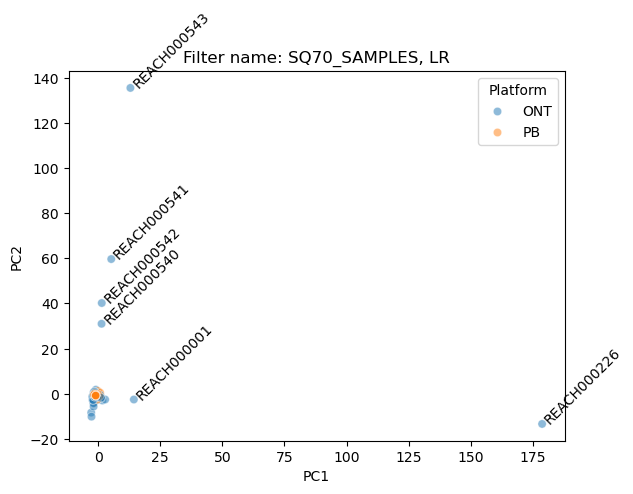

pca_calculation/PC1_vs_PC2_IL_SAMPLES.png


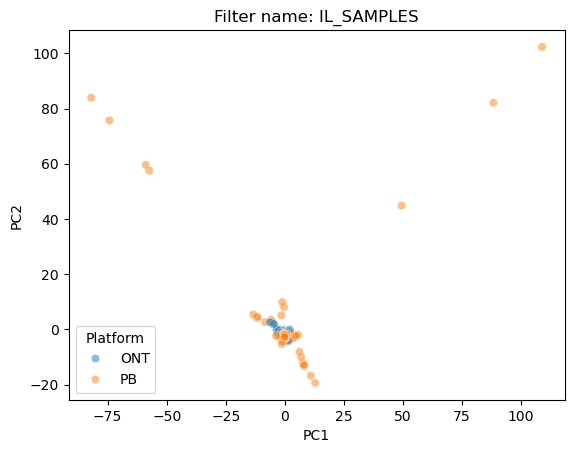

df_pca_all_lr:


,PC1_SQ70_SAMPLES,PC2_SQ70_SAMPLES,PC3_SQ70_SAMPLES,PC4_SQ70_SAMPLES,PC5_SQ70_SAMPLES,PC6_SQ70_SAMPLES,PC7_SQ70_SAMPLES,PC8_SQ70_SAMPLES,PC9_SQ70_SAMPLES,PC10_SQ70_SAMPLES,Platform,SAMPLE
0,14.362592,-2.568932,-1.339318,-0.857101,-0.970460,-1.298338,-1.272785,0.022102,-0.572527,1.549344,ONT,REACH000001
1,-1.168476,-1.056422,-0.735042,0.294166,-0.608850,-1.508923,-1.096024,-0.059286,0.388044,0.003042,PB,REACH000026
2,-0.981684,-1.016168,-1.266460,-0.793732,-1.644427,-2.119601,-1.091083,-0.245649,-0.389052,-0.025821,PB,REACH000058
3,-1.028665,-0.838226,-0.704890,-0.376187,-0.895037,-1.284662,-1.107323,0.059642,-0.232684,0.007066,PB,REACH000065
4,-1.040250,-0.840206,-1.055125,-0.136820,-0.877204,-0.853473,-0.380734,-0.662320,-0.614740,0.047020,PB,REACH000086
...,...,...,...,...,...,...,...,...,...,...,...,...
238,-1.010297,-0.812801,-0.819277,-0.407614,-0.890595,-1.274471,-1.088167,0.045589,-0.224103,-0.015531,PB,REACH000756
239,-1.053727,-0.881548,-0.792849,-0.492215,-0.934756,-1.447592,-1.281850,-0.058341,-0.226358,0.405506,PB,REACH000763
240,-1.010297,-0.812801,-0.819277,-0.407614,-0.890595,-1.274471,-1.088167,0.045589,-0.224103,-0.015531,PB,REACH000764
241,-1.010297,-0.812801,-0.819277,-0.407614,-0.890595,-1.274471,-1.088167,0.045589,-0.224103,-0.015531,PB,REACH000768


df_var_explained_lr:


,explained_variance_ratio_SQ70_SAMPLES
0,0.024775
1,0.019169
2,0.016550
3,0.015856
4,0.015686
5,0.015044
6,0.014670
7,0.014356
8,0.013383
9,0.013041


df_pca_all_sr:


,PC1_IL_SAMPLES_LR,PC2_IL_SAMPLES_LR,PC3_IL_SAMPLES_LR,PC4_IL_SAMPLES_LR,PC5_IL_SAMPLES_LR,PC6_IL_SAMPLES_LR,PC7_IL_SAMPLES_LR,PC8_IL_SAMPLES_LR,PC9_IL_SAMPLES_LR,PC10_IL_SAMPLES_LR,Platform,SAMPLE
0,2.063823,-2.701637,-2.197286,-2.191389,1.497440,-2.564836,-2.345235,-3.214921,-2.618339,-8.969975,ONT,REACH000001
1,11.112358,-16.787065,-11.175035,109.187485,-15.474701,5.011018,1.178981,2.970809,-4.457052,2.054693,PB,REACH000026
2,-0.421302,-1.994721,-1.616038,-1.142206,-1.932352,-0.962741,-0.579536,-0.971037,0.049456,-0.347768,PB,REACH000058
3,88.426900,82.058566,-5.767916,0.236821,0.226829,4.376817,-0.129520,1.758837,-0.152839,2.915678,PB,REACH000065
4,1.711889,-2.365240,-0.403930,-2.002059,-1.933016,-2.278606,-0.943335,-2.246898,-1.845576,-2.737369,PB,REACH000086
...,...,...,...,...,...,...,...,...,...,...,...,...
238,-0.027718,-1.937473,-2.235150,-3.579749,-1.691010,-1.956581,-0.478607,-2.343479,-0.426985,0.200384,PB,REACH000756
239,-0.077794,-2.072707,-1.614286,-1.477596,-2.012992,-1.492814,-0.313913,-0.973243,-1.324065,0.964225,PB,REACH000763
240,-0.076131,-2.465029,-1.448751,-1.929525,-2.084217,-1.044758,-0.996913,-0.711490,-1.133291,0.115617,PB,REACH000764
241,-1.302941,-5.264221,-5.826813,-2.015624,-6.536893,-1.326430,-20.670496,30.833695,66.741512,65.172186,PB,REACH000768


df_var_explained_sr:


,explained_variance_ratio_IL_SAMPLES_LR
0,0.018252
1,0.017719
2,0.017045
3,0.016107
4,0.015388
5,0.013603
6,0.013218
7,0.013201
8,0.012712
9,0.012566


pca_calculation/PC_data_LR.tsv
pca_calculation/PC_data_IL.tsv
pca_calculation/var_explained_data_LR.tsv
pca_calculation/var_explained_data_IL.tsv


In [11]:
### Is the outliers driven by LR or IL calls
flt_names = ['AD5_SAMPLES', 'AD4_SAMPLES', 'AD3_SAMPLES', 
             'SQ20_SAMPLES', 'SQ30_SAMPLES', 'SQ40_SAMPLES', 'SQ50_SAMPLES', 'SQ60_SAMPLES', 'SQ70_SAMPLES']
include_svtypes = ['INS', 'DEL', 'DUP', 'INV', '.']

#samples_col = 'SQ20_SAMPLES'
#samples_col = 'AD2_SAMPLES'
#samples_col = 'AD3_SAMPLES'

freq_col = 'AD2_SAMPLES'

#df_pca_all = pd.DataFrame()
#df_var_explained = pd.DataFrame()
df_pca_all_lr = pd.DataFrame()
df_var_explained_lr = pd.DataFrame()
df_pca_all_sr = pd.DataFrame()
df_var_explained_sr = pd.DataFrame()
for flt_name in flt_names[-1:]:
    print('+'*40)
    print(flt_name)
    samples_col = flt_name
    # filter for main svtypes and quality
    df_flt = get_df_flt(df, flt_name, include_svtypes, flt_sd_art=True, freq_col=freq_col, freq_thr=0.05)
    print(f'total: {df.shape}')
    print(f'filtered: {df_flt.shape}')

    #display(df_flt[flt_name])
    #display(df_flt['IL_SAMPLES_LR'])

    # make the full matrix of sample x genotypes
    #X_lr = df_flt.apply(lambda row: get_gt_col_one(row, flt_name), axis=1, result_type='expand').T
    X_lr = df_flt.apply(lambda row: get_gt_col_one(row, samples_col), axis=1, result_type='expand').T
    X_lr.index = sample_order
    
    X_sr = df_flt.apply(lambda row: get_gt_col_one(row, 'IL_SAMPLES_LR'), axis=1, result_type='expand').T
    X_sr.index = sample_order
    #print(X.shape)
    #display(X)

    # calculate PCA dim reduction with 10 components, LR
    scaler = StandardScaler()
    X_lr_standardized = scaler.fit_transform(X_lr)
    pca = PCA(n_components=10)
    principal_components_lr = pca.fit_transform(X_lr_standardized)
    df_pca_lr = pd.DataFrame(data=principal_components_lr, columns=[f'PC{i}_{flt_name}' for i in range(1,11,1)])
    #print('df_pca_lr:')
    #display(df_pca_lr)
    if df_pca_all_lr.empty:
        df_pca_all_lr = pd.DataFrame(df_pca_lr)
    else:
        df_pca_all_lr = pd.concat([df_pca_all_lr, df_pca_lr], axis=1)
    df_var_explained_lr[f'explained_variance_ratio_{flt_name}'] = pca.explained_variance_ratio_
    #print(pca.explained_variance_ratio_)
    # add platform
    df_pca_all_lr['Platform'] = df_pca_flt['Platform']
    df_pca_all_lr['SAMPLE'] = sample_order

    # calculate PCA dim reduction with 10 components, SR
    scaler = StandardScaler()
    X_sr_standardized = scaler.fit_transform(X_sr)
    pca = PCA(n_components=10)
    principal_components_sr = pca.fit_transform(X_sr_standardized)
    df_pca_sr = pd.DataFrame(data=principal_components_sr, columns=[f'PC{i}_IL_SAMPLES_LR' for i in range(1,11,1)])
    #display(df_pca)
    if df_pca_all_sr.empty:
        df_pca_all_sr = pd.DataFrame(df_pca_sr)
    else:
        df_pca_all_sr = pd.concat([df_pca_all_sr, df_pca_sr], axis=1)
    df_var_explained_sr[f'explained_variance_ratio_IL_SAMPLES_LR'] = pca.explained_variance_ratio_
    #print(pca.explained_variance_ratio_)
    # add platform
    df_pca_all_sr['Platform'] = df_pca_flt['Platform']
    df_pca_all_sr['SAMPLE'] = sample_order

    pc1_thr = 10
    pc2_thr = 20
    plt.figure()
    sb.scatterplot(data=df_pca_all_lr, x=f'PC1_{flt_name}', y=f'PC2_{flt_name}', hue='Platform', alpha=.5)
    for pc1, pc2, s in zip(df_pca_all_lr[f'PC1_{flt_name}'], df_pca_all_lr[f'PC2_{flt_name}'], df_pca_all_lr['SAMPLE']):
        if pc1 >= pc1_thr or pc2 >= pc2_thr:
            plt.text(pc1, pc2, s, rotation=45)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'Filter name: {flt_name}, LR')
    fig_name = dir_fig + f'PC1_vs_PC2_{flt_name}_LR.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    #plt.plot(df_pca.PC1, df_pca.PC2, 'o')
    plt.show()

    plt.figure()
    sb.scatterplot(data=df_pca_all_sr, x=f'PC1_IL_SAMPLES_LR', y=f'PC2_IL_SAMPLES_LR', hue='Platform', alpha=.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'Filter name: IL_SAMPLES')
    fig_name = dir_fig + f'PC1_vs_PC2_IL_SAMPLES.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    #plt.plot(df_pca.PC1, df_pca.PC2, 'o')
    plt.show()

print('df_pca_all_lr:')
display(df_pca_all_lr)
print('df_var_explained_lr:')
display(df_var_explained_lr)

print('df_pca_all_sr:')
display(df_pca_all_sr)
print('df_var_explained_sr:')
display(df_var_explained_sr)

file_name = dir_fig + f'PC_data_LR.tsv'
print(file_name)
df_pca_all_lr.to_csv(file_name, sep='\t', index=False)

file_name = dir_fig + f'PC_data_IL.tsv'
print(file_name)
df_pca_all_sr.to_csv(file_name, sep='\t', index=False)

file_name = dir_fig + f'var_explained_data_LR.tsv'
print(file_name)
df_var_explained_lr.to_csv(file_name, sep='\t', index=False)

file_name = dir_fig + f'var_explained_data_IL.tsv'
print(file_name)
df_var_explained_sr.to_csv(file_name, sep='\t', index=False)

++++++++++++++++++++++++++++++++++++++++
SQ70_SAMPLES
total: (344736, 452)
filtered: (16430, 452)
pca_calculation/PC2_vs_PC3_SQ70_SAMPLES.png


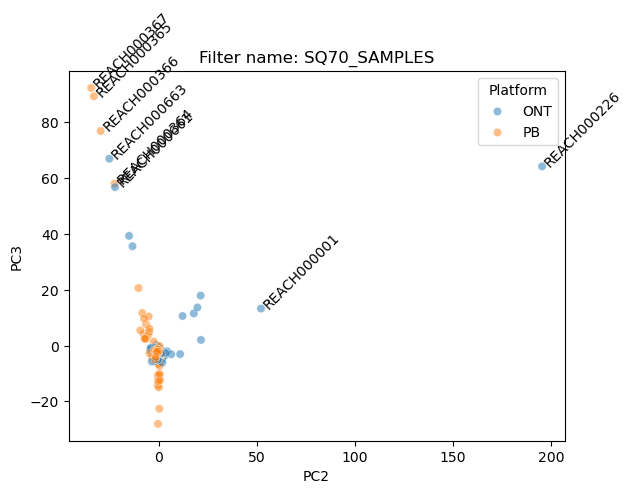

pca_calculation/PC3_vs_PC4_SQ70_SAMPLES.png


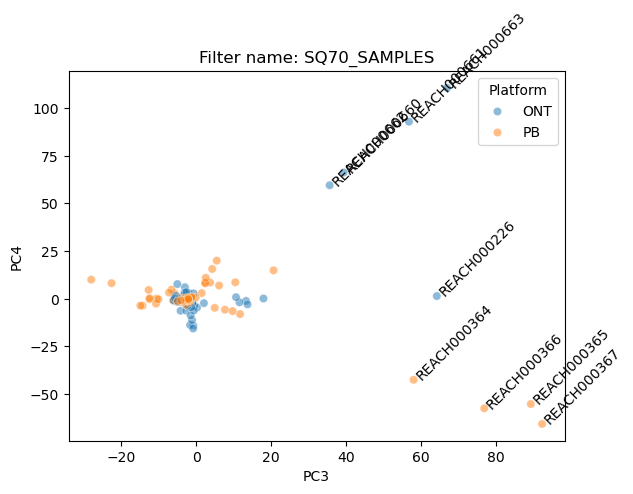

pca_calculation/PC4_vs_PC5_SQ70_SAMPLES.png


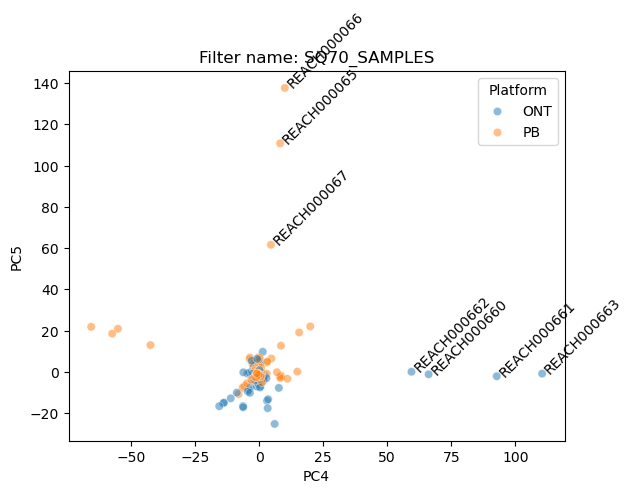

pca_calculation/PC5_vs_PC6_SQ70_SAMPLES.png


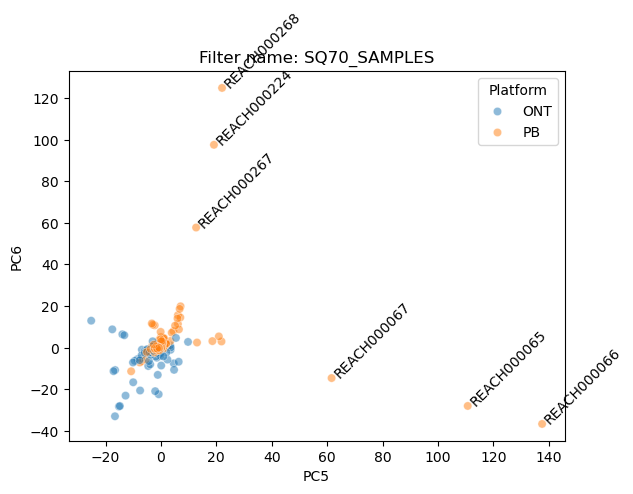

pca_calculation/PC6_vs_PC7_SQ70_SAMPLES.png


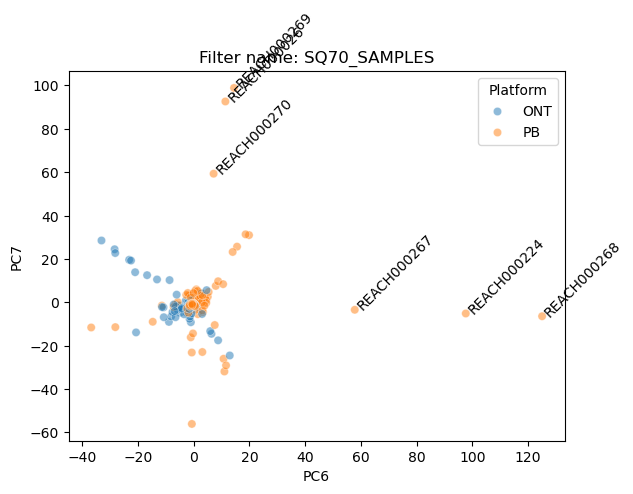

pca_calculation/PC7_vs_PC8_SQ70_SAMPLES.png


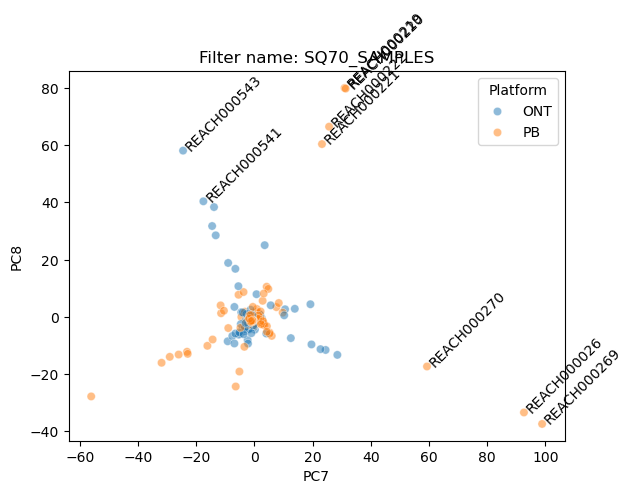

pca_calculation/PC8_vs_PC9_SQ70_SAMPLES.png


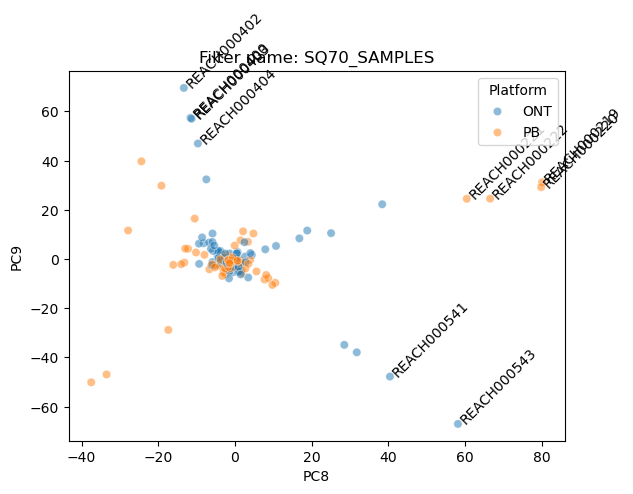

pca_calculation/PC9_vs_PC10_SQ70_SAMPLES.png


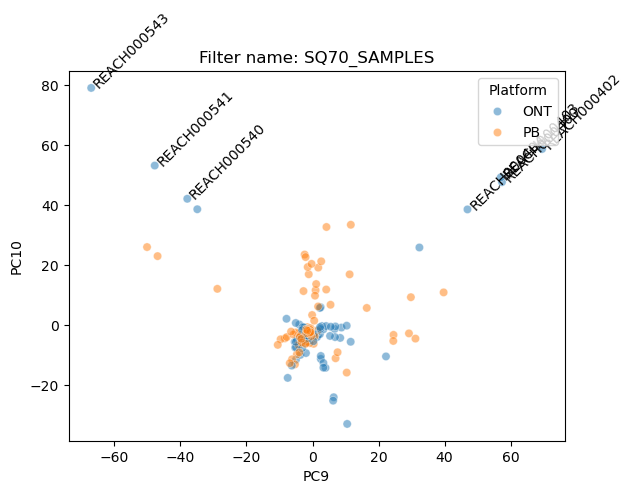

In [12]:
### plot all PC plots
flt_names = ['AD5_SAMPLES', 'AD4_SAMPLES', 'AD3_SAMPLES', 
             'SQ20_SAMPLES', 'SQ30_SAMPLES', 'SQ40_SAMPLES', 'SQ50_SAMPLES', 'SQ60_SAMPLES', 'SQ70_SAMPLES']
include_svtypes = ['INS', 'DEL', 'DUP', 'INV', '.']

#samples_col = 'SQ20_SAMPLES'
#samples_col = 'AD2_SAMPLES'
#samples_col = 'AD3_SAMPLES'

freq_col = 'AD2_SAMPLES'

df_pca_all = pd.DataFrame()
df_var_explained = pd.DataFrame()
for flt_name in flt_names[-1:]:
    print('+'*40)
    print(flt_name)
    samples_col = flt_name
    # filter for main svtypes and quality
    df_flt = get_df_flt(df, flt_name, include_svtypes, flt_sd_art=True, freq_col=freq_col, freq_thr=0.05)
    print(f'total: {df.shape}')
    print(f'filtered: {df_flt.shape}')

    #display(df_flt[flt_name])
    #display(df_flt['IL_SAMPLES_LR'])

    # make the full matrix of sample x genotypes
    #X = df_flt.apply(lambda row: get_gt_col(row, flt_name, 'IL_SAMPLES_LR'), axis=1, result_type='expand').T
    X = df_flt.apply(lambda row: get_gt_col(row, samples_col, 'IL_SAMPLES_LR'), axis=1, result_type='expand').T
    X.index = sample_order
    #print(X.shape)
    #display(X)

    # calculate PCA dim reduction with 10 components
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)
    pca = PCA(n_components=10)
    principal_components = pca.fit_transform(X_standardized)
    df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i}_{flt_name}' for i in range(1,11,1)])
    #display(df_pca)
    if df_pca_all.empty:
        df_pca_all = pd.DataFrame(df_pca)
    else:
        df_pca_all = pd.concat([df_pca_all, df_pca], axis=1)
    df_var_explained[f'explained_variance_ratio_{flt_name}'] = pca.explained_variance_ratio_
    #print(pca.explained_variance_ratio_)

    # add platform
    df_pca_all['Platform'] = df_pca_flt['Platform']
    df_pca_all['SAMPLE'] = sample_order

    pc1_thr = 40
    pc2_thr = 40
    for i_pc in range(2, 10 ,1):
        plt.figure()
        sb.scatterplot(data=df_pca_all, x=f'PC{i_pc}_{flt_name}', y=f'PC{i_pc+1}_{flt_name}', hue='Platform', alpha=.5)
        for pc1, pc2, s in zip(df_pca_all[f'PC{i_pc}_{flt_name}'], df_pca_all[f'PC{i_pc+1}_{flt_name}'], df_pca_all['SAMPLE']):
            if pc1 >= pc1_thr or pc2 >= pc2_thr:
                plt.text(pc1, pc2, s, rotation=45)
        plt.xlabel(f'PC{i_pc}')
        plt.ylabel(f'PC{i_pc+1}')
        plt.title(f'Filter name: {flt_name}')
        fig_name = dir_fig + f'PC{i_pc}_vs_PC{i_pc+1}_{flt_name}.png'
        print(fig_name)
        plt.savefig(fig_name, bbox_inches='tight')
        #plt.plot(df_pca.PC1, df_pca.PC2, 'o')
        plt.show()

#print('df_pca_all:')
#display(df_pca_all)
#print('df_var_explained:')
#display(df_var_explained)

#file_name = dir_fig + f'PC_data.tsv'
#print(file_name)
#df_pca_all.to_csv(file_name, sep='\t', index=False)

#file_name = dir_fig + f'var_explained_data.tsv'
#print(file_name)
#df_var_explained.to_csv(file_name, sep='\t', index=False)